---
title: "Intuition for a few common probability ditributions"
author: "Phan Anh VU"
date: "5/16/2022"
format:
  html:
    toc: true
categories:
  - probability
  - statistics
---

Binomial, Beta, Multinomial, Dirichlet. Here are some extremely informal thoughts about these 4 distributions. This post is mostly based on illustrations and concrete examples, with no or minimal use of formal mathematical notation.

## Binomial

Suppose we have a coin with probability 0.6 of landing on head, and 0.4 of landing on tail. The Binomial distribution allows us to sample the counts of head and tail when tossing this coin. Let us simulate 12 trials of 10 tosses with this coin.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import scipy.stats
import math

In [ ]:
pltparams = {
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'figure.titlesize': 'x-large',
    # 'savefig.dpi': 100,
}
plt.rcParams.update(pltparams)

<BarContainer object of 12 artists>

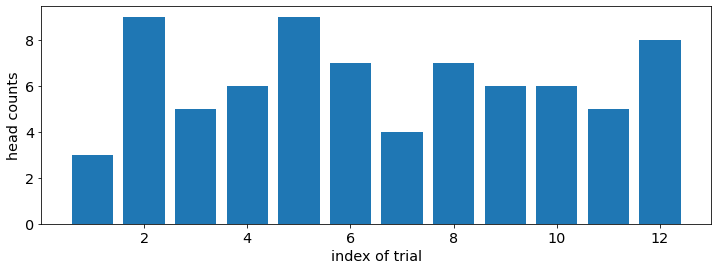

In [ ]:
head_counts = np.random.binomial(n=10, p=0.6, size=12)

plt.figure(figsize=(12, 4))
plt.bar(range(1, 13), head_counts)

plt.xlabel("index of trial")
plt.ylabel("head counts")

For each trial, we toss the coin 10 times, and record the counts of landing on head out of 10 tosses. We repeat this experiment 12 times. We expect the counts of head to be around 6 = 0.6 * 10 most of the times, because it is the hypothetical configuration that we chose. Occasionally, we get more extreme values, such as 3 or 9.

## Beta

For the Binomial (or the special case of Bernoulli) distribution, we know the parameter: the probability of landing head (success) and tail (failure). We can generate data from this model. In the opposite direction, when we have data, and want to find the parameter, we use the Beta distribution.

Binomial: Parameter -> Data

Beta: Data -> Parameter

Loosely speaking, suppose we observe 6 heads and 4 tails after flipping a coin 10 times. What can we say about the probability of landing head for this coin ? The Beta distribution with parameter [6 + 1, 4 + 1] helps us model the likelihood of this probability.



Text(0, 0.5, 'probability density')

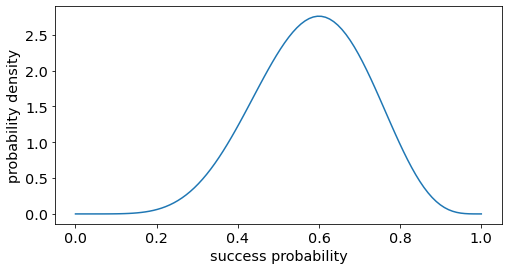

In [ ]:
xpoints = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8, 4))
plt.plot(xpoints, scipy.stats.beta.pdf(xpoints, a=7, b=5))

plt.xlabel("success probability")
plt.ylabel("probability density")

As expected, the peak (maximum likelihood estimator) is at 0.6 or 6 heads / 10 flips. Meanwhile, other neighbouring values, such as 0.59 or 0.61 , are also very likely. Let us look at the case of observing 60 heads and 40 tails for 100 tosses. We will plot the density from a Beta distribution with parameter [60 + 1, 40 + 1]

Text(0, 0.5, 'probability density')

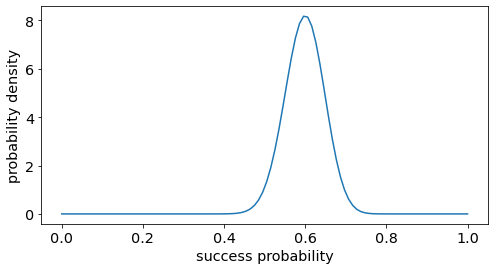

In [ ]:
xpoints = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8, 4))
plt.plot(xpoints, scipy.stats.beta.pdf(xpoints, a=61, b=41))

plt.xlabel("success probability")
plt.ylabel("probability density")

The peak is still at 0.6. However, the distribution is now much more concentrated. Previously, we observe 6 heads out of 10 tosses. Now, we observe 60 heads out of 100 tosses. Because we have more observations, our estimate for the probability of landing head = 0.6 is more confident and precise.

The uninformative case with no observation [0 head, 0 tail] corresponds to the parameter [1, 1]. The density is spread uniformly for all possible value of the success probability, between 0 and 1.



Text(0, 0.5, 'probability density')

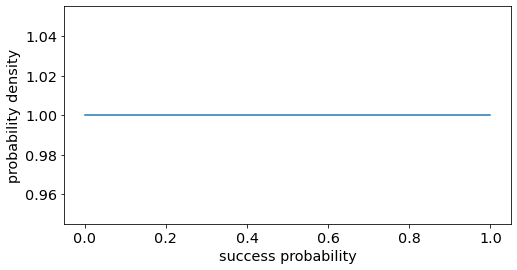

In [ ]:
xpoints = np.linspace(0, 1, 100)

fig = plt.figure(figsize=(8, 4))
plt.plot(xpoints, scipy.stats.beta.pdf(xpoints, a=1, b=1))

plt.xlabel("success probability")
plt.ylabel("probability density")

## Multinomial

Up until now, our value of interest is binary: either head or tail, success or failure, 0 or 1.

If we know the probability of success or landing head, we can generate counts of head by sampling from the binomial distribution.

Parameter -> Data : Binomial.

Conversely, if we have counts of head, we can estimate the likelihood for the probability of success.

Data -> Parameter : Beta

When the outcome has more than 2 dimensions, the multivariate generalization of Binomial is Multinomial (Categorical, Discrete) distribution, and for Beta we have Dirichlet distribution.

Instead of flipping coins, the game is now rolling dices. Suppose we have a fair dice with equal probability of landing on each side = 1/6. Let us simulate 60 rolls with this dice. We repeat this experiment 10 times, and plot the counts of landing on each side.

Text(0.5, 0, 'dice side number')

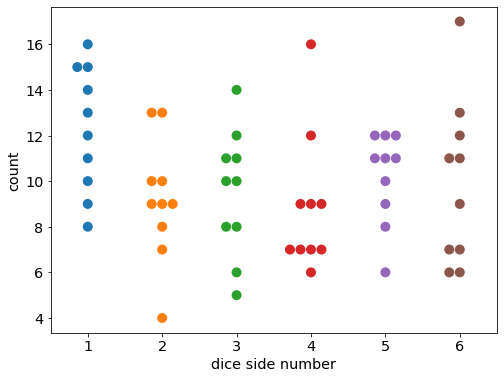

In [ ]:
dice_rolls = np.random.multinomial(n=60, pvals=[1/6.]*6, size=10)

fig = plt.figure(figsize=(8,6))
sns.swarmplot(x=np.repeat(range(1, 7), dice_rolls.shape[0]), y=dice_rolls.transpose().flatten(), s=10)

plt.ylabel("count")
plt.xlabel("dice side number")

We expect to see around 10 counts = 1/6 * 60 of each side from 1 to 6. We also observe more extreme values such as 17 and 4. As with the binomial distribution, we know the parameter: the probability of landing on each side of the dice, from 1 to 6. We can sample the counts of landing on each side from this model.

Parameter -> Data : Multinomial

Multinomial is the generalization from binary to multivariate of Binomial distribution, from 2-side coin to 6-side dice.


## Dirichlet

If we have counts of landing on each side, and wish to estimate the likelihood for the probability of each side, we use the Dirichlet distribution.

Data -> Parameter : Dirichlet

To facilitate visualization, we will consider a special dice. This special dice has the number 1 on 2 sides, number 2 on 2 sides and number 3 on the remaining 2 sides. Thus, we can describe this dice by 3 numbers, corresponding to the probability of landing on 1, 2 or 3.

These 3 numbers must form a valid probability distribution. Specifically, each component must be a real number between 0 and 1. Moreover, their sum must be 1. Let us denote by $p_1$ the probability of landing on 1, $p_2$ the probability of landing on 2, $p_3$ the probability of landing on 3.

$$
\begin{aligned}
0 \leq p_1 \leq 1 \\
0 \leq p_2 \leq 1 \\
0 \leq p_3 \leq 1 \\
p_1 + p_2 + p_3 = 1
\end{aligned}
$$

With n = the dimension of the outcome, the more general form of these conditions is:

$$
\begin{aligned}
0 \leq p_i \leq 1 ; \forall i = 1, 2, 3, ..., n \\
\sum_i^n p_i = 1
\end{aligned}
$$

These conditions define what is called probability simplex. It is simply all configurations which can form a valid probability distribution. In the 3 dimensional case, the simplex is a triangle. Let us plot some examples.

In [ ]:

#

#functions for computing and plotting dirichlet distribution

def xy2bc(xy, corners, midpoints, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

def dirichlet_pdf(pointarray, alpha):
    # x=x/np.sum(x) : enforce simplex constraint
    density = np.array([scipy.stats.dirichlet.pdf(x=x/np.sum(x), alpha=alpha) for x in pointarray])
    return density

def draw_dirichlet_contours(density, trimesh, xymesh, figsize=(6,6), nlevels=100, **kwargs):
    fig = plt.figure(figsize=figsize)
    plt.tricontourf(trimesh, density, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.colorbar()

    return fig

def plot_surface(trimesh, density, figsize=(8,6)):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=figsize)
    surf = ax.plot_trisurf(trimesh.x, trimesh.y, density, cmap="viridis")
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xticks([])
    ax.set_yticks([])

    return fig

# http://christianherta.de/lehre/dataScience/bayesian/Multinomial-Dirichlet.slides.php

In [ ]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

xymesh = np.array([xy2bc(xy, corners, midpoints) for xy in zip(trimesh.x, trimesh.y)])


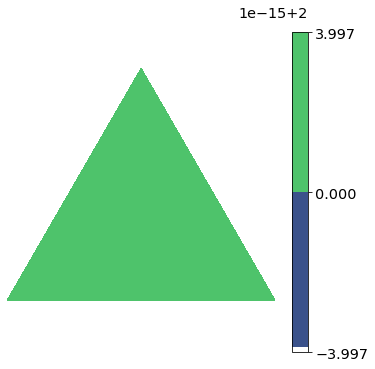

In [ ]:
density = dirichlet_pdf(xymesh, [1, 1, 1])
fig = draw_dirichlet_contours(density, trimesh, xymesh)

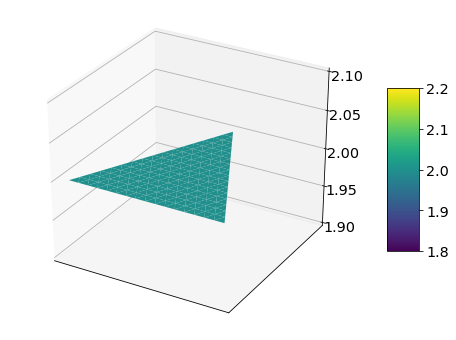

In [ ]:
fig = plot_surface(trimesh, density)

The 1st plot is a contour plot. The triangle is the probability simplex in 3 dimensions. In other words, it represent all combination of a trio $[p_1, p_2, p_3]$, which lies between 0 and 1 and sums up to 1. The color denotes density.

The corner of the triangle are extremely skewed configuration:

$$
\begin{aligned}
[p_1 = 1, p_2 = 0, p_3 = 0] \\
[p_1 = 0, p_2 = 1, p_3 = 0] \\
[p_1 = 0, p_2 = 0, p_3 = 1]
\end{aligned}
$$

The center of the triangle is the equal probability configuration:
$$[p_1 = 1/3, p_2 = 1/3, p_3 = 1/3]$$

The 2nd plot is a surface plot, or a 3 dimensional representation of the 2-dimensional contour plot. The probability simplex triangle lies in the plane at the bottom. Density is represented by color and altitude.


Above is a Dirichlet distribution with parameter [1, 1, 1]. This is the uninformative case with no obsersation, as with the Beta distribution we saw earlier. The density is spread out uniformly on the whole simplex triangle.

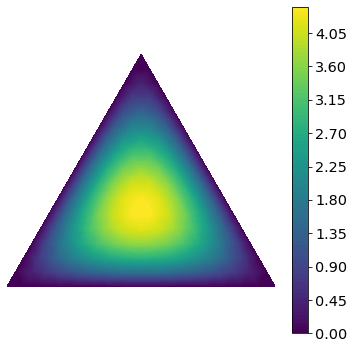

In [ ]:
density = dirichlet_pdf(xymesh, [2, 2, 2])
fig = draw_dirichlet_contours(density, trimesh, xymesh)

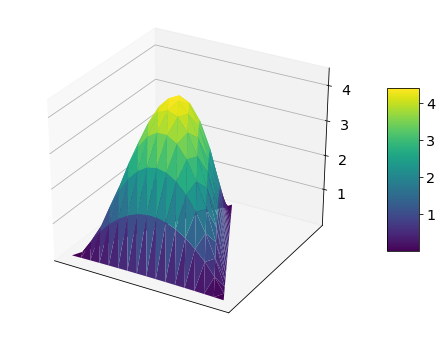

In [ ]:
fig = plot_surface(trimesh, density)

This is a Dirichlet density with parameter [2, 2, 2]. In this case, we observe 1 count of landing on 1, 1 count of landing on 2, and 1 count of landing on 3 with our special dice. Reasonably, the most likely parameters are at the center of the triangle, the equal probability configuration $[p_1 = 1/3, p_2 = 1/3, p_3 = 1/3]$. The density decreases gradually as we move from the center to the corners.

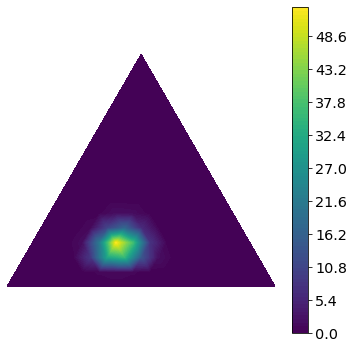

In [ ]:
density = dirichlet_pdf(xymesh, [31, 21, 11])
fig = draw_dirichlet_contours(density, trimesh, xymesh)
# fig.savefig("dirichlet-density.svg")

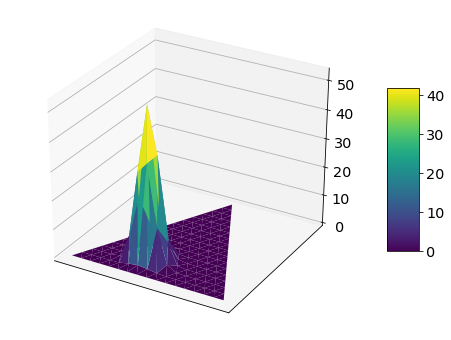

In [ ]:
fig = plot_surface(trimesh, density)

In this example, we observe 30 counts of 1, 20 counts of 2 and 10 counts of 3. The density is thus most strongly skewed toward the left corner, corresponding to the value 1, where $[p_1 = 1, p_2 = 0, p_3 = 0]$. Compared to the previous case of 1 count for each number [1, 1, 1], the density is also much more concentrated. We also saw this with the Beta distribution. The more observation we have, the more confident and precise the estimate for the probability will be.

## Summary

Here is an anecdotal way of thinking about these 4 distributions:

Binomial (Bernoulli): a manufacturer gives us a coin, and tells us its probability of landing on head. We flip the coin, and expect the count of head to be close to the theoretical value.

Multinomial: a manufacturer gives us a dice, and tells us the probability of landing on each side. We roll the dice, and expect to see the count for each side to be close to the theoretical value.

Beta: we ask a manufacturer to make a coin with a specific configuration. For example, we want to get 6 heads out of 10 flips.

Dirichlet: we ask a manufacturer to make a dice with a specific configuration. For example, we want to get 1 counts for each of the sides 1, 2, 3, and 2 counts for each of the sides 4, 5, 6, for a total of 9 rolls.

For Beta and Dirichlet, the manufacturer will be sensitive to the degree of precision that we require. When we ask for 60 heads out of 100 flips, we expect the probability of landing head to be more concentrated around 0.6, compared to 6 head out of 10.


Here is a recapitulative table summarizing the relationships between these 4 distributions

|  | Parameter -> Data | Data -> Parameter |
| --- | --- | --- |
| Binary (coin) | Binomial | Beta |
| Multivariate (dice) | Multinomial | Dirichlet

## Sum of random variables

This final section is small digression. Here is an intuitive explanation for the Central Limit Theorem: with large enough sample size, the sum (or mean) of independent samples drawn from an identical distribution of any kind, including non Gaussian, will approach a Gaussian shape.

Let us look at a simple case of summing 2 uniform random variables. For a more concrete example, we will examine the sum of 2 fair dices. The theoretical result is:

2 = 1 + 1 => probability = 1 / 36

3 = 2 + 1 => probability = 2 / 36

4 = 1 + 3 = 2 + 2 => probability = 3 / 36

5 = 1 + 4 = 2 + 3 => probability = 4 / 36

6 = 1 + 5 = 2 + 4 = 3 + 3 => probability = 5 / 36

7 = 6 + 1 = 2 + 5 = 3 + 4 => probability = 6 / 36

8 = 2 + 6 = 3 + 5 = 4 + 4 => probability = 5 / 36

9 = 6 + 3 = 5 + 4 => probability = 4 / 36

10 = 6 + 4 = 5 + 5 => probability = 3 / 36

11 = 5 + 6 => probability = 2 / 36

12 = 6 + 6 => probability = 1 / 36







Text(0.5, 0, 'sum of 2 dices')

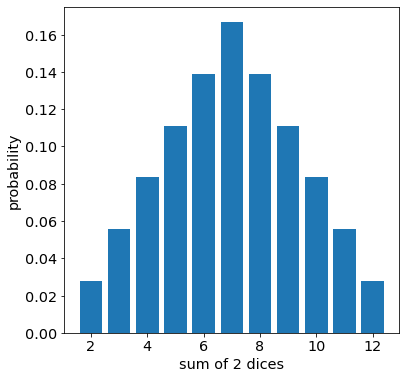

In [ ]:
proba_sum2dices = np.concatenate([np.arange(1, 7), np.arange(5, 0, -1)]) / 36

fig = plt.figure(figsize=(6, 6))
plt.bar(np.arange(2, 13), proba_sum2dices )
plt.ylabel("probability")
plt.xlabel("sum of 2 dices")

We can already notice the bell shaped curve, even though the initial uniform distribution is very different from a gausian distribution. When summing 2 dices, number 7 has the widest range of possible combinations. Thus it is the most likely values. The probability decreases symmetrically, when we move away from the mode to the 2 extremes.

Next time when you question why the Central Limit Theorem holds in practice, perhaps it may help to think about the sum of 2 dices.

